<a href="https://colab.research.google.com/github/cesarmontenegrosilva/mineracao_de_dados/blob/main/Algoritmos_para_Mineracao_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exemplo do algoritmo  não supervisionado k-means**

In [20]:
#importa as bibliotecas necessárias
from pandas import DataFrame
import matplotlib.pyplot as plt


In [21]:
#cria dados aleatórios
dados = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }

In [23]:
#cria o dataframe
df = DataFrame(dados,columns=['x','y'])
df.head()

,x,y
0,25,79
1,34,51
2,22,53
3,27,78
4,33,59


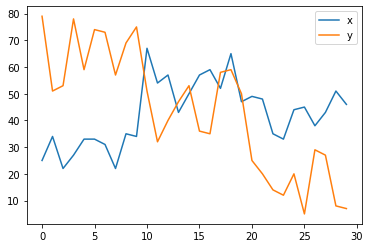

In [24]:
df.plot()

In [25]:
#adiciona as bibliotecas para construir o algoritmo
from sklearn.cluster import KMeans

In [26]:
kmeans = KMeans(n_clusters=4)    # cria o objeto de para o algoritmo k-means para encontrar 2 clusters
kmeans.fit(df)  #aplica o algoritmo
centroides = kmeans.cluster_centers_   #encontra as coordenadas dos centroids
print(centroides)

[[43.2        16.7       ]
 [27.75       55.        ]
 [55.1        46.1       ]
 [30.83333333 74.66666667]]


Text(0, 0.5, 'Y')

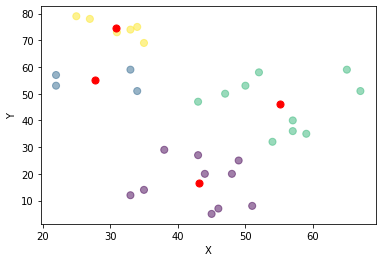

In [27]:
#realiza o plot do gráfico da saída
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', s=50)
plt.xlabel("X")
plt.ylabel("Y")

**Exemplo do algoritmo Supervisionado  - KNN**

In [28]:
#importando as bibliotecas 
import pylab as pl
from sklearn import neighbors, datasets
import pandas as pd
import numpy as np

In [29]:
#cria a rotina para utilizar o dataset Iris
iris = datasets.load_iris()


In [30]:
#Converte o banco de dados iris para o dataframe
df_iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [31]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [32]:
#transforma os dados em array
X = df_iris.iloc[:, :-1].values  #dados de entrada
y = df_iris.iloc[:, 4].values  # saídas ou target

In [33]:
#realiza a divisão dos dados entre treinamento e teste
from sklearn.model_selection import train_test_split   # função que realiza a divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)# divide 20% para teste

In [34]:
# realiza o processo de normalização dos dados
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  #objeto que normaliza os dados
scaler.fit(X_train)  #realiza a normalização dos dados

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [35]:
#treina o modelo 
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #utiliza a construção por meio de 5 vizinhos
classifier.fit(X_train, y_train) # aplica a classificação

KNeighborsClassifier()

In [36]:
#realiza a previsão
y_pred = classifier.predict(X_test)

In [37]:
#constroi a matriz de confusão para comparar o modelo criado
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[10  0  0]
 [ 0 12  0]
 [ 0  2  6]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        10
         1.0       0.86      1.00      0.92        12
         2.0       1.00      0.75      0.86         8

    accuracy                           0.93        30
   macro avg       0.95      0.92      0.93        30
weighted avg       0.94      0.93      0.93        30



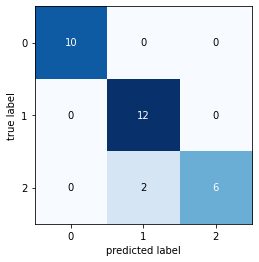

In [38]:
#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo do algoritmo Supervisionado  - Árvore de Decisão**

In [39]:
from sklearn.tree import DecisionTreeClassifier # importa o classificador árvore de decisão
from sklearn import metrics #importa as métricas para avaliação


In [40]:
# Cria o objeto de classificação através do 
clf = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf = clf.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

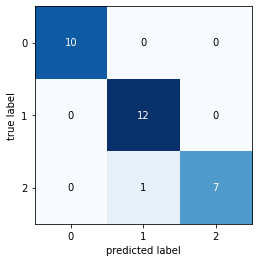

In [41]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

In [44]:
#visualização da árvore de decisão
#impor das bibliotecas necessárias para realizar a visualização da árvore de decisão
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

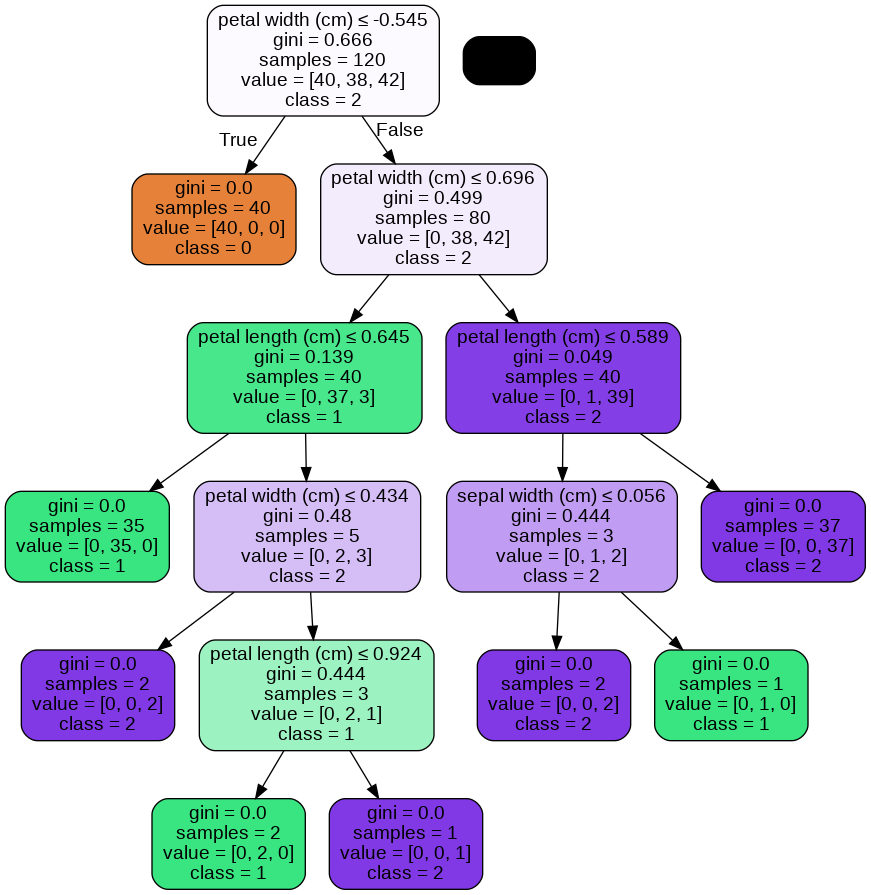

In [45]:
#Constrói a árvore de decisão para o DB Iris
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.feature_names,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('iris.png')
Image(graph.create_png())

**Exemplo do algoritmo Supervisionado  - Support Vector Machine (SVM)**

In [46]:
#biblioteca necessária para a construção do SVM
from sklearn.svm import SVC

In [47]:
#cria o objeto SVM
clf = SVC(gamma='auto')  #escolhe o kernel linear

In [48]:
#realiza a classificação via SVM
clf.fit(X_train,y_train)

SVC(gamma='auto')

In [49]:
#Realiza a previsão de classificaçao 
y_pred = clf.predict(X_test)

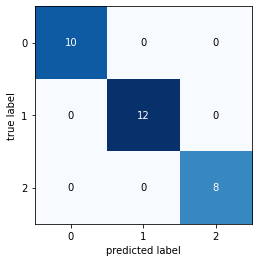

In [50]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()

**Exemplo de Redes Neurais**

In [51]:
#definição da biblioteca
from sklearn.neural_network import MLPClassifier

In [52]:
#define a configuração da rede
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1) #rede com 2 camadas escondidas com 5 neurônios cada 

In [53]:
#realiza o fit do modelo
clf.fit(X_train,y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 5), random_state=1,
              solver='lbfgs')

In [54]:
#realiza a previsão
y_pred=clf.predict(X_test)

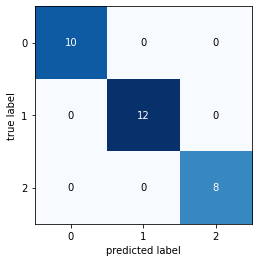

In [55]:
#Avaliando o modelo 

#realiza o plot da matriz de confusão
matriz_confusao = confusion_matrix(y_test, y_pred)
from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=matriz_confusao)
plt.show()